In [1]:
import sys
import os

file_path = globals()['_dh'][0]
sys.path.append(os.path.abspath(os.path.join(file_path, "../..")))

import numpy as np
from model_equations import Model
from miniature_octo_chainsaw.logging_ import logger
from miniature_octo_chainsaw.preprocessing.preprocess_data import DataPreprocessor
from miniature_octo_chainsaw.parameter_estimation.initial_guess import InitialGuessGenerator
from miniature_octo_chainsaw.parameter_estimation.parameter_estimator import ParameterEstimator
from miniature_octo_chainsaw.parameter_estimation.results import save_results_as_pickle

logger.setLevel("INFO")

[10-09 10:07:19] {yaml_parser:128} INFO - Model specifications not loaded yet. Parsing now.
[10-09 10:07:19] {yaml_parser:38} INFO - Parsing model specifications.
[10-09 10:07:19] {yaml_parser:18} INFO - Loading YAML file: c:\Users\hridy\Documents\uni-heidelberg\software\miniature-octo-chainsaw\examples\peroxidase_oxidase/model_specifications.yaml
[10-09 10:07:19] {yaml_parser:21} INFO - Successfully loaded YAML file.
[10-09 10:07:19] {yaml_parser:132} INFO - Meta parameters not loaded yet. Parsing now.
[10-09 10:07:19] {yaml_parser:49} INFO - Parsing meta parameters.
[10-09 10:07:19] {yaml_parser:18} INFO - Loading YAML file: c:\Users\hridy\Documents\uni-heidelberg\software\miniature-octo-chainsaw\examples\peroxidase_oxidase/meta_parameters.yaml
[10-09 10:07:19] {yaml_parser:21} INFO - Successfully loaded YAML file.
[10-09 10:07:19] {base_model:69} INFO - True model parameters: {'k1': 0.2, 'k2': 1.75, 'k3': 2.75, 'k4': 0.3, 'k5': 5, 'k6': 0.14}
[10-09 10:07:19] {base_model:70} INFO - 

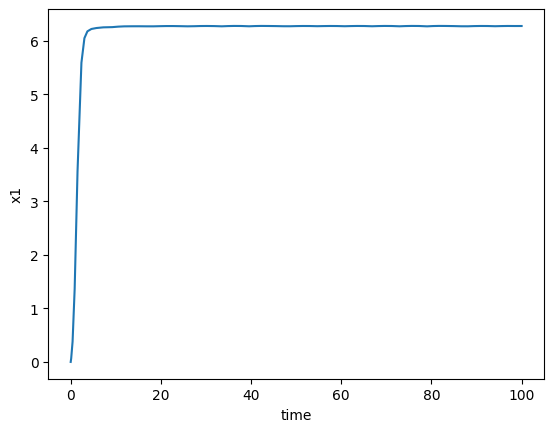

[10-09 10:07:20] {initial_guess:27} INFO - Step 2: Continue the steady state to draw a bifurcation diagram.


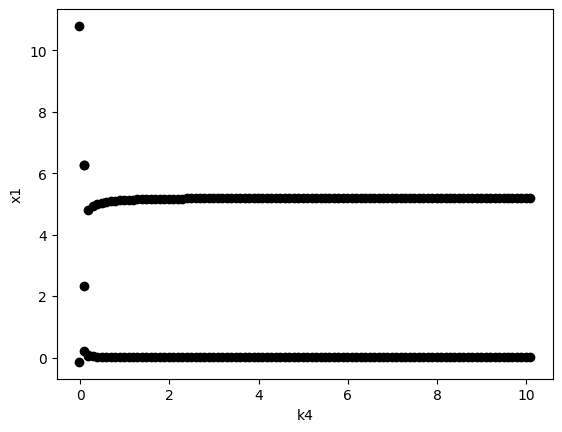

[10-09 10:07:24] {deflated_continuation:502} INFO - A bifurcation was detected near k4 = 0.1873426761253299.
[10-09 10:07:24] {bifurcation_point:113} WARNING - Objective function is satisfied only upto 2.331e-07
[10-09 10:07:24] {bifurcation_point:115} INFO - Found a bifurcation point at 0.06642509121916446.
[10-09 10:07:24] {initial_guess:32} INFO - Step 3: Trace a two-parameter bifurcation diagram along the data.


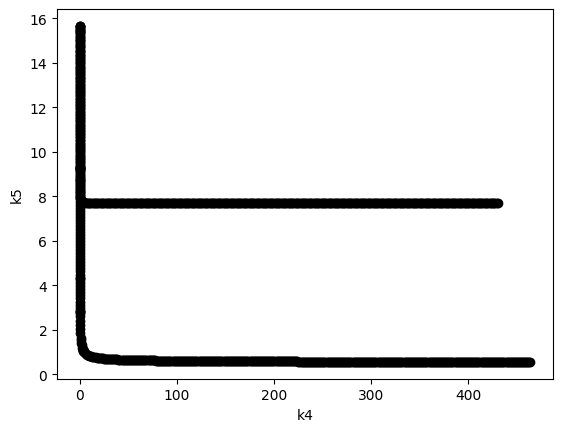

[10-09 10:07:33] {initial_guess:37} INFO - Step 5: Match the predicted points to experimental data.
[10-09 10:07:33] {initial_guess:43} INFO - Step 6: Append global parameters to the initial guess.


In [2]:
# Load the model and randomize the parameters
model = Model()
model.generate_parameter_guesses()

# Preprocess the data
data_preprocessor = DataPreprocessor()
data_preprocessor.load_the_data(file_path=os.path.join(file_path))
data_preprocessor.add_noise_to_the_data(scale=model.data_noise)
data_preprocessor.select_subset_of_data(length=25)
model.data = data_preprocessor.data

# Generate initial guesses for the parameter estimation
initializer = InitialGuessGenerator(model=model)

[10-09 10:07:34] {parameter_estimator:82} INFO - Estimate the model parameters using osqp solver.
c:\Users\hridy\Documents\uni-heidelberg\software\venv\Lib\site-packages\osqp\utils.py:118: UserWarning: Converting sparse P to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse P to a CSC " +
c:\Users\hridy\Documents\uni-heidelberg\software\venv\Lib\site-packages\osqp\utils.py:122: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse A to a CSC " +


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 128, constraints m = 105
          nnz(P) + nnz(A) = 504
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.8218e+00   2.87e-02   1.35e-01   1.00e-01   2.74e-04s
  25  -2.8426e+00   1.07e-06   6.41e-07   1.00e-01   3.55e-04s

status:               solved
number of itera

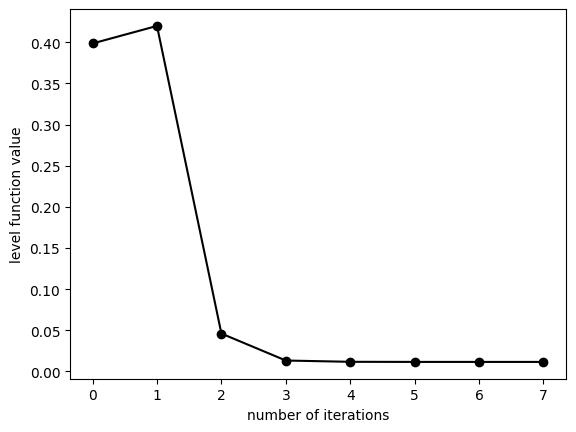

[10-09 10:07:38] {parameter_estimator:86} INFO - Solver has converged in 8 iterations!
[10-09 10:07:38] {parameter_estimator:87} INFO - Initial guesses: {'k1': np.float64(0.1319399245376044), 'k2': np.float64(0.5179016747558112)}.
[10-09 10:07:38] {parameter_estimator:88} INFO - Solutions: {'k1': np.float64(0.30344231918843845), 'k2': np.float64(1.7267426012350064)}.
[10-09 10:07:38] {parameter_estimator:91} INFO - Confidence intervals: {'k1': np.float64(0.024452046243950188), 'k2': np.float64(0.09985349845432735)}.


Function __run_solver took 4.181 seconds.


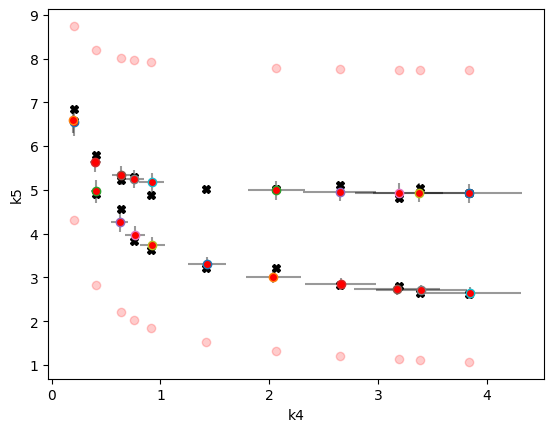

In [3]:
# Solve parameter estimation problem
fit_osqp = ParameterEstimator(
    x0=initializer.initial_guesses,
    mask=initializer.mask,
    model=model,
    n_experiments=int(sum(initializer.mask)),
    method="osqp",
    plot_iters=True,
    compute_ci=True,
    timer=True,
)

[10-09 10:07:38] {parameter_estimator:82} INFO - Estimate the model parameters using gauss-newton solver.


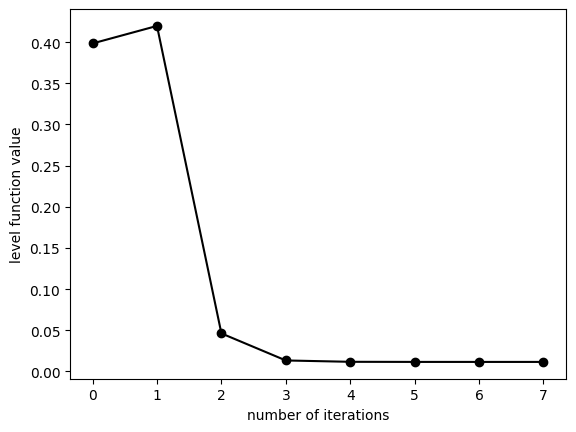

[10-09 10:07:44] {parameter_estimator:86} INFO - Solver has converged in 8 iterations!
[10-09 10:07:44] {parameter_estimator:87} INFO - Initial guesses: {'k1': np.float64(0.1319399245376044), 'k2': np.float64(0.5179016747558112)}.
[10-09 10:07:44] {parameter_estimator:88} INFO - Solutions: {'k1': np.float64(0.3034400947462827), 'k2': np.float64(1.7267240781687152)}.
[10-09 10:07:44] {parameter_estimator:91} INFO - Confidence intervals: {'k1': np.float64(0.024460307140332874), 'k2': np.float64(0.09988875023972836)}.


Function __run_solver took 6.431 seconds.


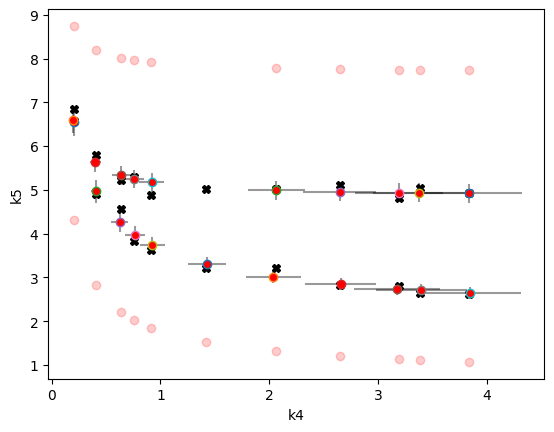

In [4]:
fit_gn = ParameterEstimator(
    x0=initializer.initial_guesses,
    mask=initializer.mask,
    model=model,
    n_experiments=int(sum(initializer.mask)),
    method="gauss-newton",
    plot_iters=True,
    compute_ci=True,
    timer=True,
)

In [5]:
np.diag(fit_osqp.result.covariance_matrix)[:20]

array([1.07542216e+01, 6.03940832e+02, 3.54125333e-02, 6.60318520e+00,
       1.02072220e-01, 1.00222566e-03, 2.78664093e+01, 2.35746853e+03,
       3.67898515e-02, 5.61697104e+00, 4.89625616e-01, 8.90834663e-03,
       1.71440300e-01, 5.48212835e+01, 1.43760208e-01, 4.11923403e+00,
       6.72855590e-04, 3.09996921e-06, 2.72362803e+00, 5.77886405e+01])

In [6]:
np.diag(fit_gn.result.covariance_matrix)[:20]

array([1.07478037e+01, 6.03540989e+02, 3.54123525e-02, 6.60338623e+00,
       1.02000607e-01, 1.00144279e-03, 2.78468077e+01, 2.35588096e+03,
       3.67900727e-02, 5.61677478e+00, 4.89331885e-01, 8.90411700e-03,
       1.71435425e-01, 5.48220615e+01, 1.43760106e-01, 4.11925807e+00,
       6.72808102e-04, 3.09971893e-06, 2.72359296e+00, 5.77869243e+01])

In [7]:
fit_gn.result.x[:10]

array([ 1.10160459, 18.14286033,  0.20112158,  6.55966821,  0.098603  ,
       -0.99512685,  1.4106166 , 15.6745659 ,  0.19892203,  6.59276497])

In [8]:
fit_osqp.result.x[:10]

array([ 1.10164285, 18.14251503,  0.20112184,  6.55969026,  0.09860689,
       -0.99512647,  1.41055275, 15.67507139,  0.19892211,  6.5927821 ])